In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
print(df.dtypes)
print("\nShape = ",df.shape)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Shape =  (768, 9)


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [7]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
#df_new=df[(df[1]!=0) & (df[2]!=0) & (df[3]!=0) & (df[5]!=0)]
df_new = df[(df[['Glucose','BloodPressure','SkinThickness','BMI']] != 0).all(axis=1)]

In [10]:
X=df_new.drop(columns=['Outcome']).to_numpy()
Y=df_new['Outcome'].to_numpy()

In [11]:
print("The shape of X: ",X.shape)
print("The shape of Y: ",Y.shape)

The shape of X:  (532, 8)
The shape of Y:  (532,)


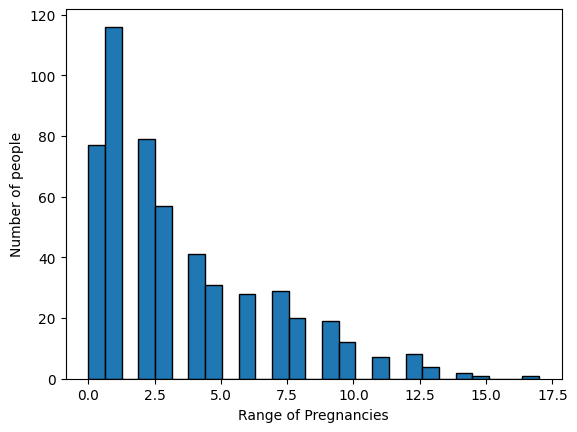

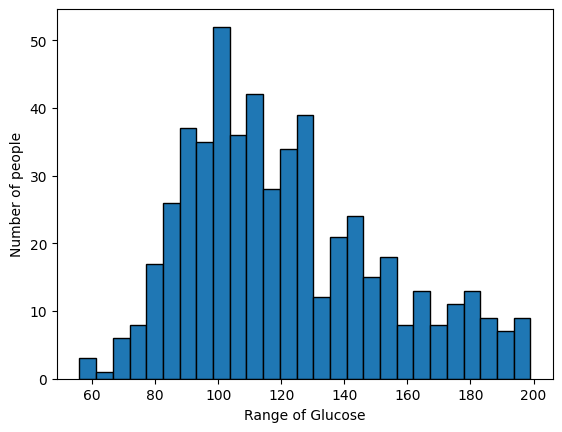

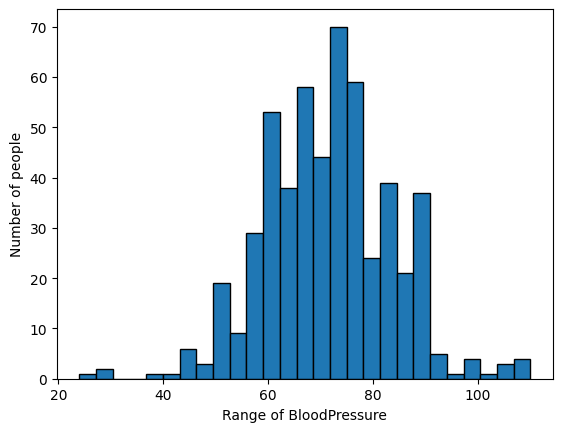

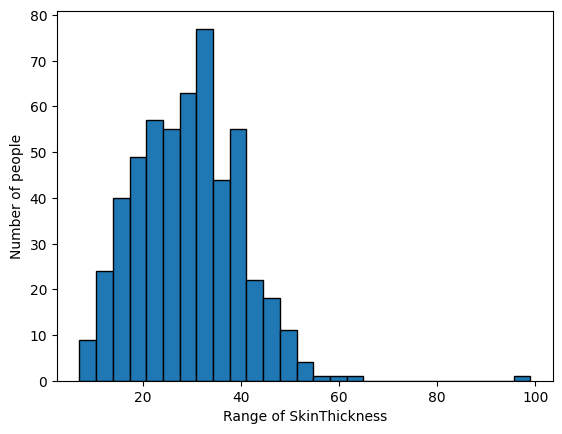

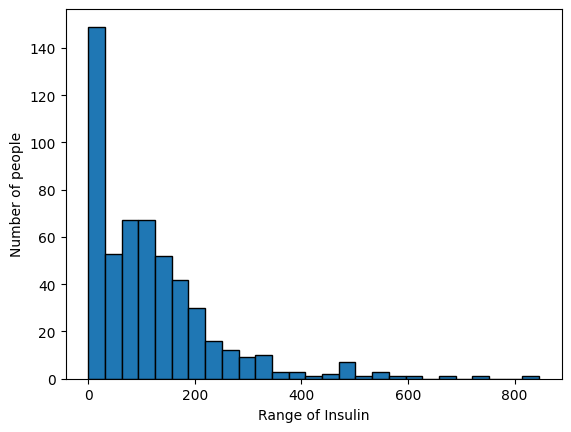

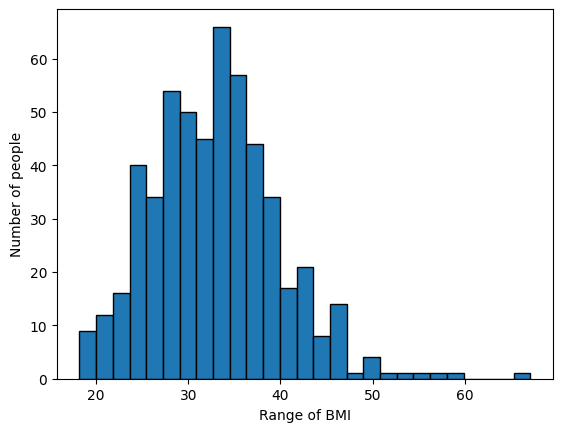

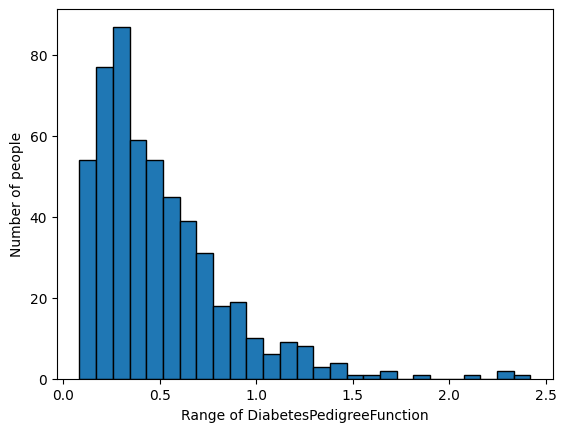

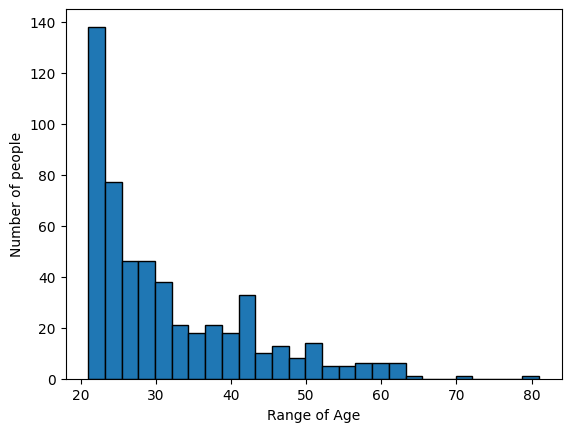

In [12]:
#Histogram of all features vs number of examples
try:
    for i in list(df.columns):
        plt.hist(X[:,df.columns.get_loc(i)],bins=27,edgecolor='black')
        plt.xlabel(f"Range of {i}")
        plt.ylabel("Number of people")
        plt.show()
except IndexError:
    pass

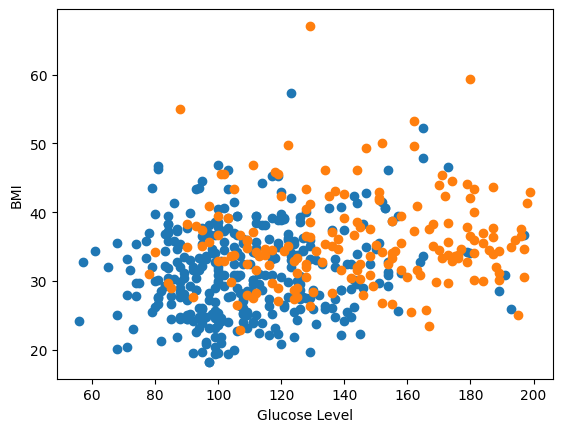

In [13]:
#Scatter Plot of two major features
plt.scatter(X[Y==0][:,1],X[Y==0][:,5])
plt.scatter(X[Y==1][:,1],X[Y==1][:,5])
plt.xlabel('Glucose Level')
plt.ylabel('BMI')
plt.show()

In [20]:
#Feature Scaling
nu=np.mean(X,axis=0)
X_norm=(X-(nu.T))/(np.max(X,axis=0)-np.min(X,axis=0))
print(X_norm)

[[ 1.46063689e-01  1.88600873e-01  5.74838258e-03 ...  1.45148146e-02
   5.31194152e-02  3.06422306e-01]
 [-1.48053958e-01 -2.51958568e-01 -6.40190593e-02 ... -1.28634470e-01
  -6.50818696e-02 -1.02443609e-02]
 [-1.48053958e-01 -2.23986540e-01 -6.40190593e-02 ... -9.79596230e-02
  -1.43882726e-01 -1.76911028e-01]
 ...
 [-8.92304290e-02  6.78269099e-03 -1.75074314e-02 ...  7.99544874e-02
  -6.97927903e-02 -7.69110276e-02]
 [ 8.72401592e-02 -2.10316000e-04  5.74838258e-03 ... -1.36814429e-01
  -1.10478015e-01 -2.69110276e-02]
 [-1.48053958e-01 -1.96014512e-01 -1.75074314e-02 ... -5.09248582e-02
  -8.04994284e-02 -1.43577694e-01]]


In [32]:
#Training set split
X_train=X_norm[:int(0.6*532),:]
Y_train=Y[:int(0.6*532)]
X_cv=X_norm[int(0.6*532):int(0.8*532),:]
Y_cv=Y[int(0.6*532):int(0.8*532)]
X_test=X_norm[int(0.8*532):,:]
Y_test=Y[int(0.8*532):]

In [25]:
def sigmoid(z):
    f_wb=(1/(1+np.exp(-z)))
    return f_wb

In [26]:
def cost_func(X_train,Y_train,W,b,lambda_):
    m,n=X_train.shape
    for i in range(m):
        z=np.dot(W,X_train[i,:])+b
        f_wb=sigmoid(z)
        cost+=Y_train[i]*np.log(f_wb)+(1-Y_train[i])*np.log(1-f_wb)
    reg=(lambda_/(2*m))*np.sum(W**2)
    cost=(-1/m)*cost
    cost=cost+reg
    return cost

In [35]:
def gradient(X_train,Y_train,W,b,lambda_):
    m=X_train.shape[0]
    dw=0
    db=0
    for i in range(m):
        z=np.dot(W,X_train[i,:])+b
        f_wb=sigmoid(z)
        dw+=(f_wb-Y_train[i])*X_train[i,:]
        db+=(f_wb-Y_train[i])
    dw=((1/m)*dw)+(lambda_/m)*W
    db=(1/m)*db
    return dw,db

In [38]:
def model(X_train,Y_train,W,b,alpha,lambda_,it):
    Wf=W
    bf=b
    for i in range(it):
        dw1,db1=gradient(X_train,Y_train,Wf,bf,lambda_)
        Wf=Wf-(alpha*dw1)
        bf=bf-(alpha*db1)
    return Wf,bf

In [50]:
W=np.zeros(X.shape[1])
b=0
alpha=0.001
iterations=1000
lambda_=1
predict=0
W_new,b_new=model(X_train,Y_train,W,b,alpha,lambda_,iterations)
user_input=input("Enter the feature list: ")
X_new=np.array([float(i) for i in user_input.split(',')])
z=np.dot(W_new,X_new)+b_new
Y_hat=sigmoid(z)
if Y_hat>=0.5:
    predict=1
elif Y_hat<0.5:
    predict=0
print(Y_hat)
print(f"Prediction: {predict}")

Enter the feature list:  10,101,76,48,180,32.9,0.171,63


0.9999904183643081
Prediction: 1


In [41]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0
